In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
train=pd.read_csv("Heart.csv")
train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [56]:
train.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [57]:
train.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [58]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [59]:
train.target.unique()

array([1, 0], dtype=int64)

In [60]:
train.sex.unique()

array([1, 0], dtype=int64)

In [61]:
train.thal.unique()

array([1, 2, 3, 0], dtype=int64)

In [62]:
train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [63]:
df_female = [rows for _, rows in train.groupby('sex')][0]
df_male= [rows for _, rows in train.groupby('sex')][1]

In [64]:
df_female=df_female.drop(['sex'], axis=1)
df_male=df_male.drop(['sex'], axis=1)

In [65]:
df_male.head()

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,2,130,250,0,1,187,0,3.5,0,0,2,1
3,56,1,120,236,0,1,178,0,0.8,2,0,2,1
5,57,0,140,192,0,1,148,0,0.4,1,0,1,1
7,44,1,120,263,0,1,173,0,0.0,2,0,3,1


Text(0.5,0.98,'Pie Chart for Chest Pain Type')

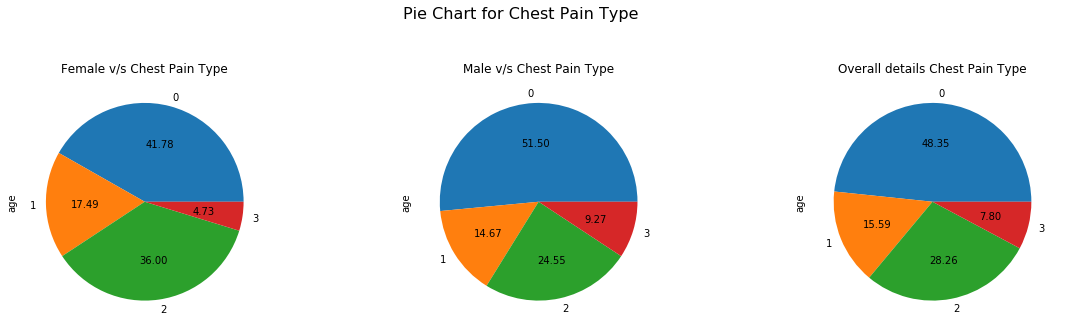

In [88]:
import matplotlib.ticker as ticker
import matplotlib.cm as cm
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
plt.figure(1, figsize=(20,10))
the_grid = GridSpec(2, 3)
plt.subplot(the_grid[0, 0], aspect=1, title='Female v/s Chest Pain Type')
df_female.age.groupby(df_female.cp).sum().plot(kind='pie',autopct='%.2f')

plt.subplot(the_grid[0, 1], aspect=1, title='Male v/s Chest Pain Type')
df_male.age.groupby(df_male.cp).sum().plot(kind='pie',autopct='%.2f')

plt.subplot(the_grid[0, 2], aspect=1, title='Overall details Chest Pain Type')
train.age.groupby(train.cp).sum().plot(kind='pie',autopct='%.2f')

plt.suptitle('Pie Chart for Chest Pain Type', fontsize=16)


C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.

C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



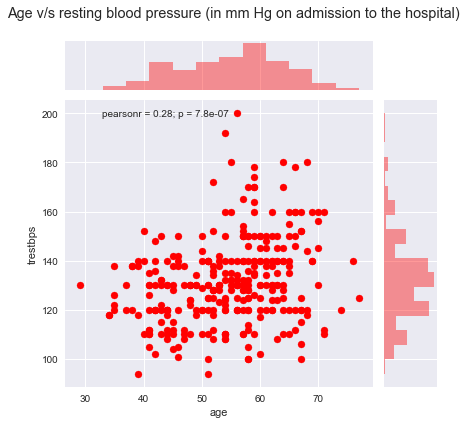

In [135]:
g=sns.jointplot(x="age", y="trestbps", data=train, color="r")
plt.subplots_adjust(top=.9)
g.fig.suptitle('Age v/s resting blood pressure (in mm Hg on admission to the hospital)') 
plt.show()

C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.

C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



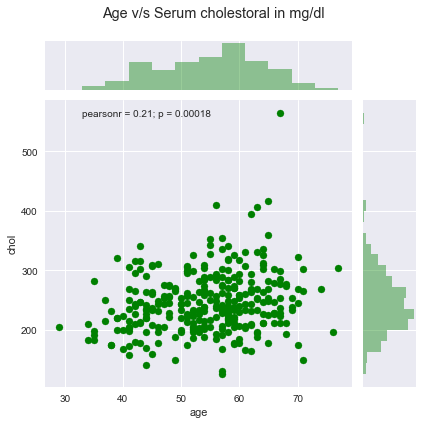

In [137]:
g=sns.jointplot(x="age", y="chol", data=train, color="g")
plt.subplots_adjust(top=.9)
g.fig.suptitle('Age v/s Serum cholestoral in mg/dl') 
plt.show()

Text(0.5,0.98,'Pie Chart for Fasting Blood Sugar')

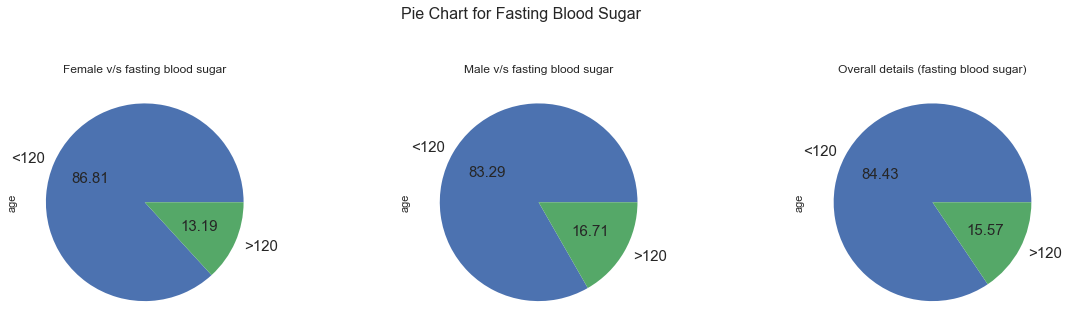

In [166]:
plt.figure(1, figsize=(20,10))

plt.subplot(the_grid[0, 0], aspect=1 ,title='Female v/s fasting blood sugar')
df_female.age.groupby(df_female.fbs).sum().plot(kind='pie',autopct='%.2f',labels=['<120','>120'],textprops={'fontsize': 15})

plt.subplot(the_grid[0, 1], aspect=1, title='Male v/s fasting blood sugar')
df_male.age.groupby(df_male.fbs).sum().plot(kind='pie',autopct='%.2f',labels=['<120','>120'],textprops={'fontsize': 15})

plt.subplot(the_grid[0, 2], aspect=1, title='Overall details (fasting blood sugar)')
train.age.groupby(train.fbs).sum().plot(kind='pie',autopct='%.2f',labels=['<120','>120'],textprops={'fontsize': 15})

plt.suptitle('Pie Chart for Fasting Blood Sugar', fontsize=16)

Text(0.5,0.98,'Pie Chart for Resting Electrocardiographic Results')

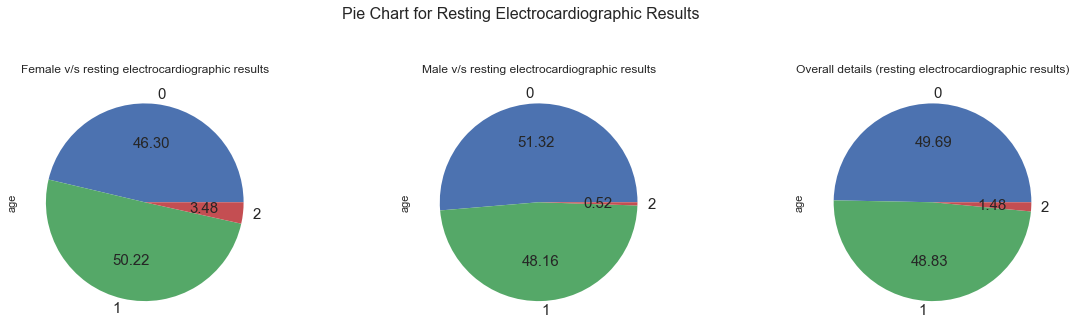

In [167]:
plt.figure(1, figsize=(20,10))

plt.subplot(the_grid[0, 0], aspect=1 ,title='Female v/s resting electrocardiographic results')
df_female.age.groupby(df_female.restecg).sum().plot(kind='pie',autopct='%.2f',textprops={'fontsize': 15})

plt.subplot(the_grid[0, 1], aspect=1, title='Male v/s resting electrocardiographic results')
df_male.age.groupby(df_male.restecg).sum().plot(kind='pie',autopct='%.2f',textprops={'fontsize': 15})

plt.subplot(the_grid[0, 2], aspect=1, title='Overall details (resting electrocardiographic results)')
train.age.groupby(train.restecg).sum().plot(kind='pie',autopct='%.2f',textprops={'fontsize': 15})

plt.suptitle('Pie Chart for Resting Electrocardiographic Results', fontsize=16)

C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.

C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



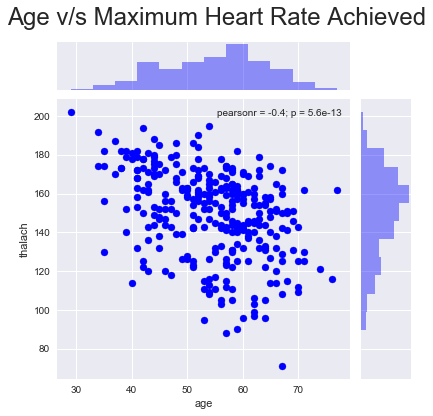

In [169]:
g=sns.jointplot(x="age", y="thalach", data=train, color="b")
plt.subplots_adjust(top=.9)
g.fig.suptitle('Age v/s Maximum Heart Rate Achieved') 
plt.show()

Text(0.5,0.98,'Pie Chart for Exercise Induced Angina')

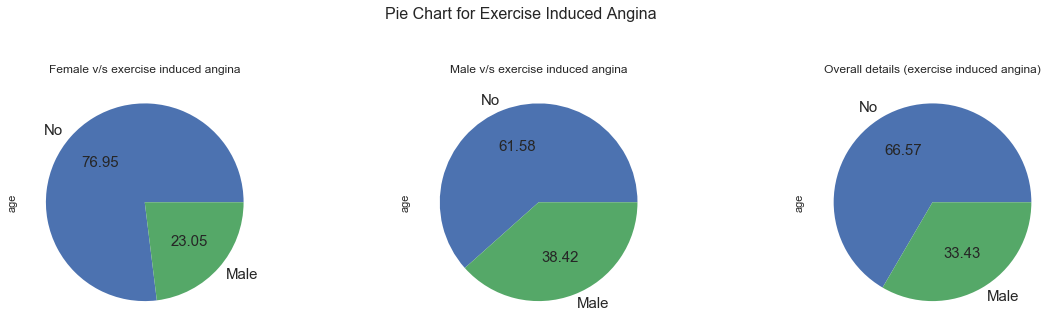

In [171]:
plt.figure(1, figsize=(20,10))

plt.subplot(the_grid[0, 0], aspect=1 ,title='Female v/s exercise induced angina')
df_female.age.groupby(df_female.exang).sum().plot(kind='pie',autopct='%.2f',labels=['No','Male'],textprops={'fontsize': 15})

plt.subplot(the_grid[0, 1], aspect=1, title='Male v/s exercise induced angina')
df_male.age.groupby(df_male.exang).sum().plot(kind='pie',autopct='%.2f',labels=['No','Male'],textprops={'fontsize': 15})

plt.subplot(the_grid[0, 2], aspect=1, title='Overall details (exercise induced angina)')
train.age.groupby(train.exang).sum().plot(kind='pie',autopct='%.2f',labels=['No','Male'],textprops={'fontsize': 15})

plt.suptitle('Pie Chart for Exercise Induced Angina', fontsize=16)

C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.

C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



<Figure size 1440x1440 with 0 Axes>

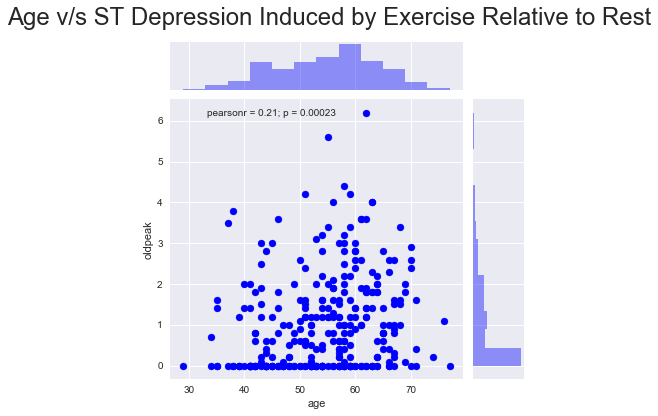

In [176]:
plt.figure(1, figsize=(20,20))
g=sns.jointplot(x="age", y="oldpeak", data=train, color="b")
plt.subplots_adjust(top=.9)
g.fig.suptitle('Age v/s ST Depression Induced by Exercise Relative to Rest') 
plt.show()

Text(0.5,0.98,'Pie Chart for The Slope of the Peak Exercise ST Segment')

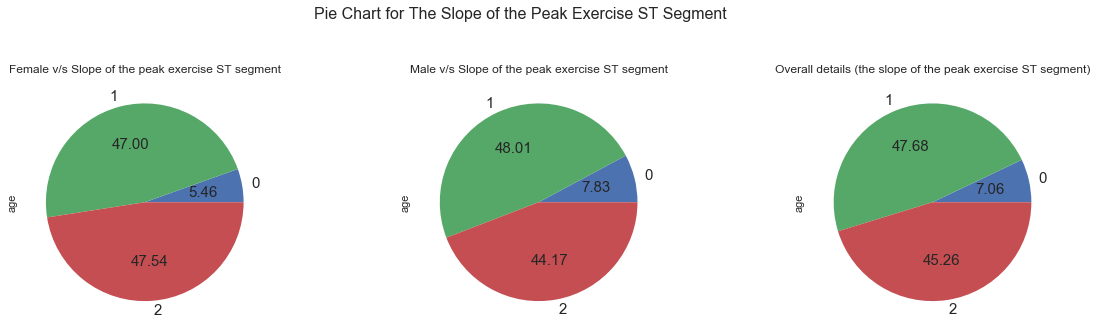

In [178]:
plt.figure(1, figsize=(20,10))

plt.subplot(the_grid[0, 0], aspect=1 ,title='Female v/s Slope of the peak exercise ST segment')
df_female.age.groupby(df_female.slope).sum().plot(kind='pie',autopct='%.2f',textprops={'fontsize': 15})

plt.subplot(the_grid[0, 1], aspect=1, title='Male v/s Slope of the peak exercise ST segment')
df_male.age.groupby(df_male.slope).sum().plot(kind='pie',autopct='%.2f',textprops={'fontsize': 15})

plt.subplot(the_grid[0, 2], aspect=1, title='Overall details (the slope of the peak exercise ST segment)')
train.age.groupby(train.slope).sum().plot(kind='pie',autopct='%.2f',textprops={'fontsize': 15})

plt.suptitle('Pie Chart for The Slope of the Peak Exercise ST Segment', fontsize=16)

Text(0.5,0.98,'Pie Chart for Number of Major Vessels (0-3) Colored by Flourosopy')

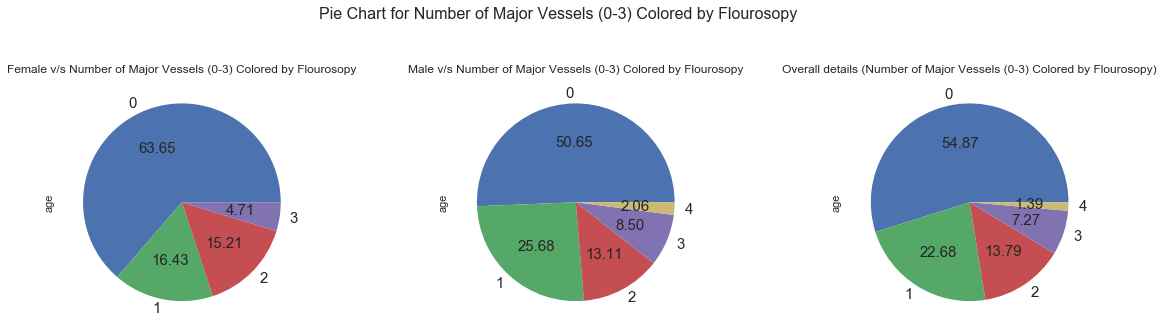

In [179]:
plt.figure(1, figsize=(20,10))

plt.subplot(the_grid[0, 0], aspect=1 ,title='Female v/s Number of Major Vessels (0-3) Colored by Flourosopy')
df_female.age.groupby(df_female.ca).sum().plot(kind='pie',autopct='%.2f',textprops={'fontsize': 15})

plt.subplot(the_grid[0, 1], aspect=1, title='Male v/s Number of Major Vessels (0-3) Colored by Flourosopy')
df_male.age.groupby(df_male.ca).sum().plot(kind='pie',autopct='%.2f',textprops={'fontsize': 15})

plt.subplot(the_grid[0, 2], aspect=1, title='Overall details (Number of Major Vessels (0-3) Colored by Flourosopy)')
train.age.groupby(train.ca).sum().plot(kind='pie',autopct='%.2f',textprops={'fontsize': 15})

plt.suptitle('Pie Chart for Number of Major Vessels (0-3) Colored by Flourosopy', fontsize=16)

Text(0.5,0.98,'Pie Chart for Thal')

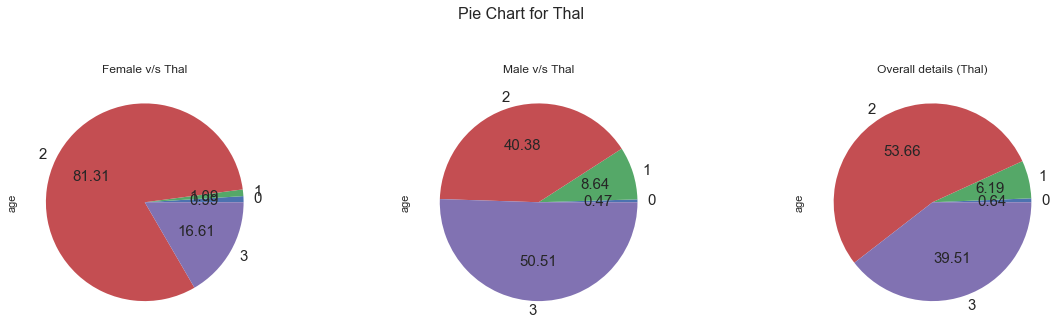

In [180]:
plt.figure(1, figsize=(20,10))

plt.subplot(the_grid[0, 0], aspect=1 ,title='Female v/s Thal')
df_female.age.groupby(df_female.thal).sum().plot(kind='pie',autopct='%.2f',textprops={'fontsize': 15})

plt.subplot(the_grid[0, 1], aspect=1, title='Male v/s Thal')
df_male.age.groupby(df_male.thal).sum().plot(kind='pie',autopct='%.2f',textprops={'fontsize': 15})

plt.subplot(the_grid[0, 2], aspect=1, title='Overall details (Thal)')
train.age.groupby(train.thal).sum().plot(kind='pie',autopct='%.2f',textprops={'fontsize': 15})

plt.suptitle('Pie Chart for Thal', fontsize=16)

Text(0.5,0.98,'Pie Chart for Target')

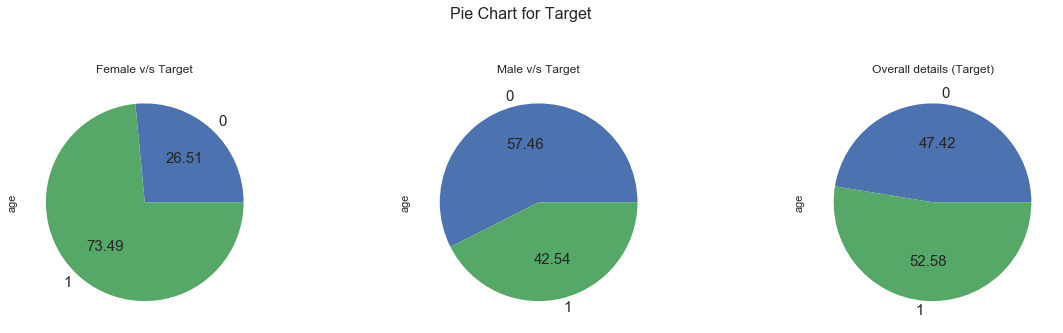

In [181]:
plt.figure(1, figsize=(20,10))

plt.subplot(the_grid[0, 0], aspect=1 ,title='Female v/s Target')
df_female.age.groupby(df_female.target).sum().plot(kind='pie',autopct='%.2f',textprops={'fontsize': 15})

plt.subplot(the_grid[0, 1], aspect=1, title='Male v/s Target')
df_male.age.groupby(df_male.target).sum().plot(kind='pie',autopct='%.2f',textprops={'fontsize': 15})

plt.subplot(the_grid[0, 2], aspect=1, title='Overall details (Target)')
train.age.groupby(train.target).sum().plot(kind='pie',autopct='%.2f',textprops={'fontsize': 15})

plt.suptitle('Pie Chart for Target', fontsize=16)

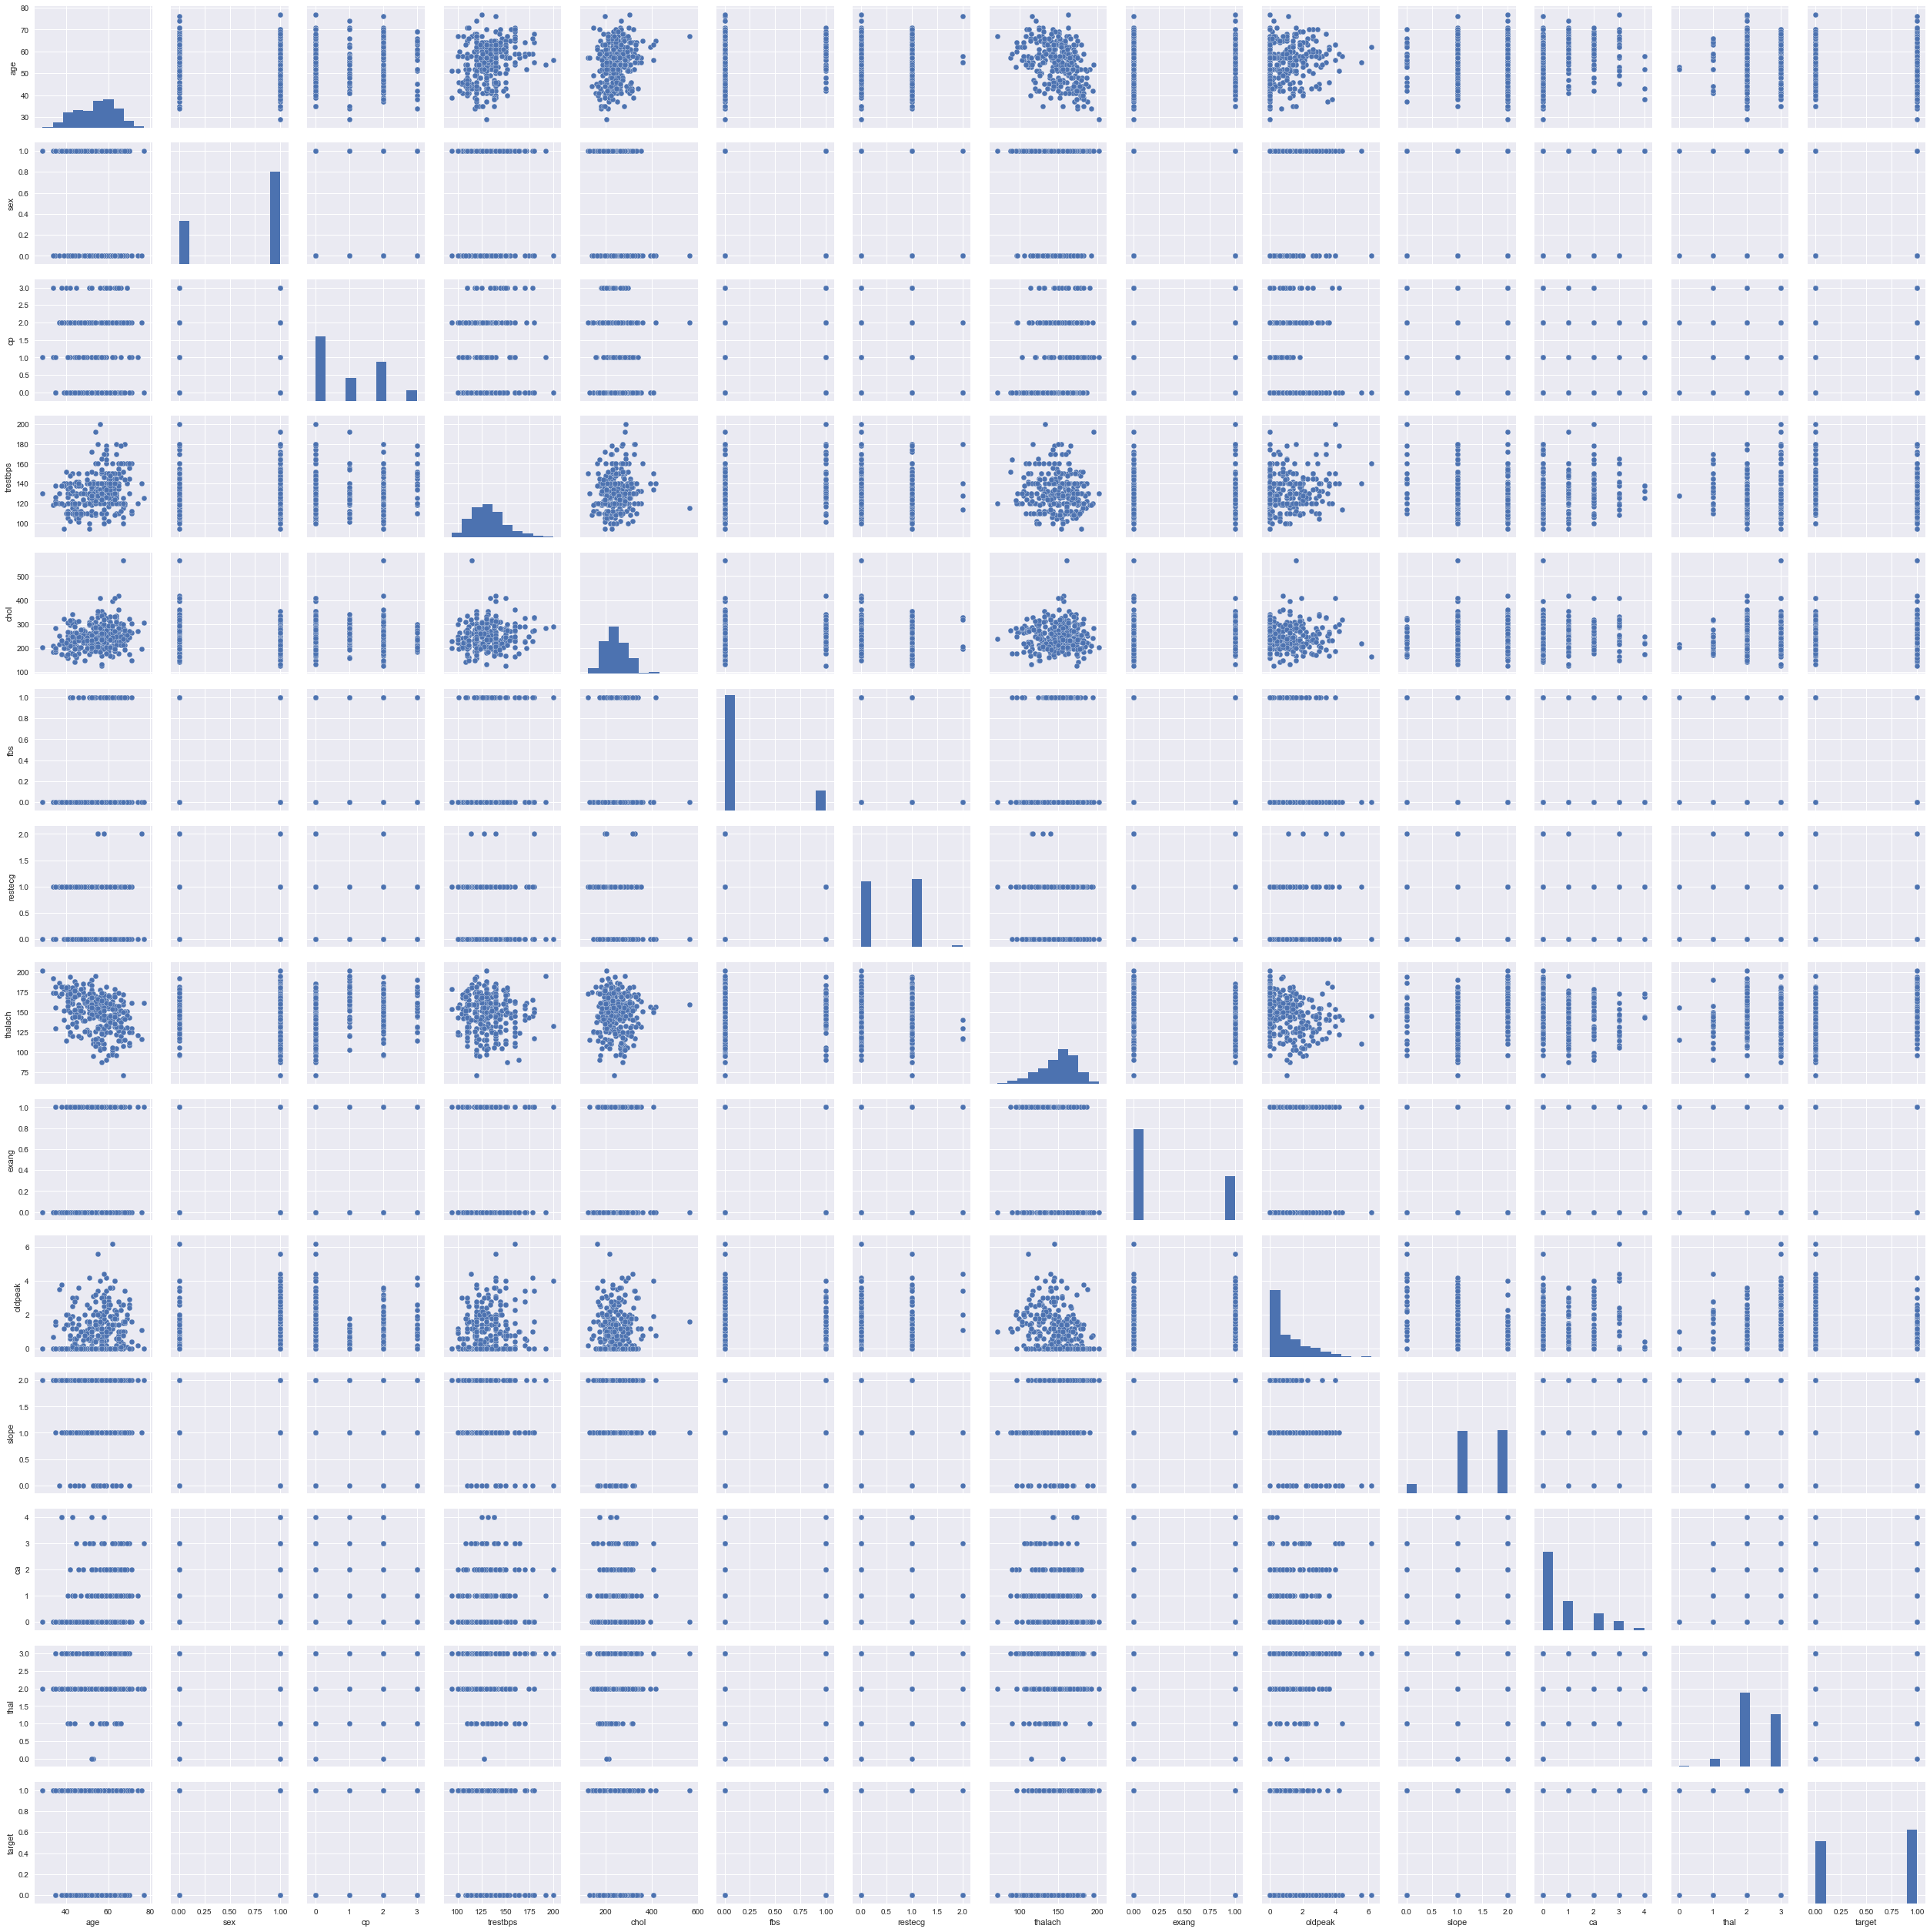

In [187]:
%matplotlib inline
plt.rcParams['figure.figsize']=20,20
sns.pairplot(train)

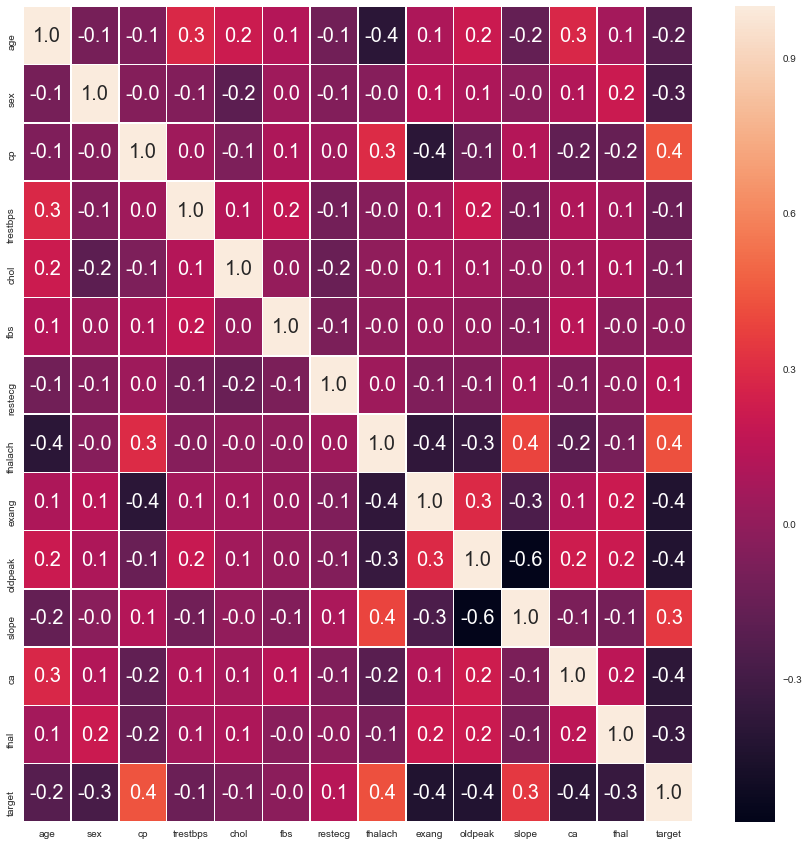

In [183]:
f,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(train.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

In [188]:
X=train.iloc[:,:-1]
y=train.iloc[:,-1]

In [255]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(242, 13) (242,)
(61, 13) (61,)


In [275]:
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB() 
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test) 
from sklearn import metrics 
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100,"%")

Gaussian Naive Bayes model accuracy(in %): 83.60655737704919 %


In [277]:
from sklearn.svm import SVC #
svcclf = SVC(kernel='linear')
svcclf.fit(X, y)
y_pred2 = svcclf.predict(X_test)
print("Support Vector Classifier model accuracy(in %):", metrics.accuracy_score(y_test, y_pred2)*100,"%")

Support Vector Classifier model accuracy(in %): 90.1639344262295 %
